In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
datasets = ['toy_2', 'grid', 'Erding_NDP_S020']
best_solution = [19114, 49279, 12291729]
best_solution = pd.Series(best_solution, index=datasets, name='best_sol')
best_bound = [19114, 47824, 12206083]
best_bound = pd.Series(best_bound, index=datasets, name='best_bound')
sp = [19236, 50384, 12293346]
sp = pd.Series(sp, index=datasets, name='sp')
gnn = [21796, 63861, 16847133]
gnn = pd.Series(gnn, index=datasets, name='gnn')

In [19]:
df = pd.DataFrame([best_solution, best_bound, sp, gnn]).T
df

,best_sol,best_bound,sp,gnn
toy_2,19114,19114,19236,21796
grid,49279,47824,50384,63861
Erding_NDP_S020,12291729,12206083,12293346,16847133


In [20]:
df['best_gap'] = df['best_sol'] / df['best_bound'] - 1
df['sp_gap'] = df['sp'] / df['best_bound'] - 1
df['gnn_gap'] = df['gnn'] / df['best_bound'] - 1
df = df.rename_axis('dataset', axis='index').reset_index()
df

,dataset,best_sol,best_bound,sp,gnn,best_gap,sp_gap,gnn_gap
0,toy_2,19114,19114,19236,21796,0.000000,0.006383,0.140316
1,grid,49279,47824,50384,63861,0.030424,0.053530,0.335334
2,Erding_NDP_S020,12291729,12206083,12293346,16847133,0.007017,0.007149,0.380224


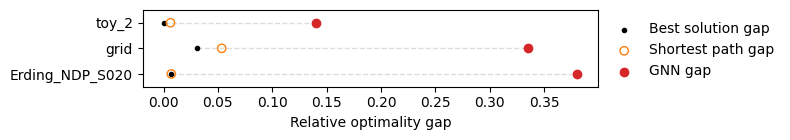

In [104]:
fig, ax = plt.subplots(figsize=(8,1.5))
# ax.set_xscale('log')
ax.margins(y=0.25)
ax.invert_yaxis()
# ax.set_title('Optimality gaps with respect to the best bound')
ax.set_xlabel('Relative optimality gap')
# ax.set_ylabel('Dataset')
args = {
    'best_gap': {
        'label': 'Best solution gap',
        'c': 'black',
        'marker': '.',
        # 'facecolors': 'black'
    },
    'sp_gap': {
        'label': 'Shortest path gap',
        # 'c': 'tab:orange',
        'marker': 'o',
        'edgecolors': 'tab:orange',
        'facecolors': 'none'
    },
    'gnn_gap': {
        'label': 'GNN gap',
        'c': 'tab:red',
        'marker': 'o',
        # 's': 20,
    },
}

# for col, marker, c in [('best_gap', '.', 'black') , ('sp_gap', 'o', 'tab:orange'), ('gnn_gap', '+', 'tab:blue')]:
#     ax.scatter(df[col], df['dataset'], marker=marker, label=labels[col], facecolors='none', edgecolors=c)

for key, arg in args.items():
    ax.scatter(df[key], df['dataset'], **arg)
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1), frameon=False)

for idx, dataset in df['dataset'].items():
    ax.plot([df.loc[idx, 'best_gap'], df.loc[idx, 'gnn_gap']], [dataset, dataset], c='#ddd', linewidth=1, linestyle='--', zorder=-1)

# for spine in ax.spines.values():
#     spine.set_visible(False)
# plt.subplots_adjust(left=0.4, right=0.6, top=0.95, bottom=0.5)
fig.tight_layout()
# fig.savefig('figures/eval-timpasslib.pdf')
